## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading Data and Analysis

In [56]:
# Data Attributes description

'''
age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)
'''

'\nage - age in years\nsex - (1 = male; 0 = female)\ncp - chest pain type\ntrestbps - resting blood pressure (in mm Hg on admission to the hospital)\nchol - serum cholestoral in mg/dl\nfbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\nrestecg - resting electrocardiographic results\nthalach - maximum heart rate achieved\nexang - exercise induced angina (1 = yes; 0 = no)\noldpeak - ST depression induced by exercise relative to rest\nslope - the slope of the peak exercise ST segment\nca - number of major vessels (0-3) colored by flourosopy\nthal - 3 = normal; 6 = fixed defect; 7 = reversable defect\ntarget - have disease or not (1=yes, 0=no)\n'

In [57]:
df = pd.read_csv('heart_disease.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [58]:
print(df.shape)
print(df.info())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [59]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


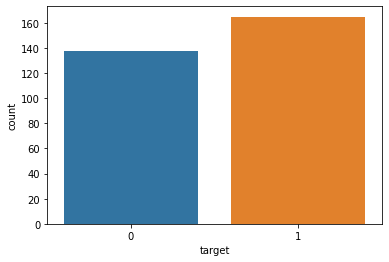

In [147]:
# Plot of number of persons having heart disease and no heart disease
# 0 --> no disease 1--> heart disease
sns.countplot('target', data = df)

In [61]:
print("Percentage of persons not having heart disease:{:.2f} %".format(df[df['target']==0].shape[0] / df.shape[0] * 100))
print("Percentage of persons having heart disease:{:.2f} %".format(df[df['target']==1].shape[0] / df.shape[0] * 100))

Percentage of persons not having heart disease:45.54 %
Percentage of persons having heart disease:54.46 %


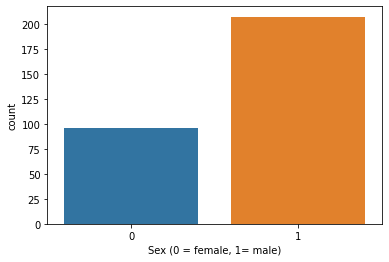

In [148]:
# Male and Female Count Plot
sns.countplot('sex', data = df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

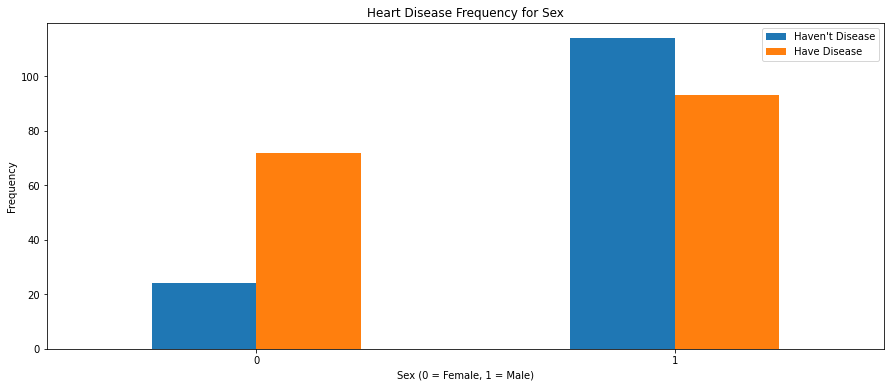

In [149]:
# Analysis of Heart disease freq for male and female
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [64]:
'''
age 
sex         
cp          
trestbps    
chol        
fbs         
restecg     
thalach     
exang       
oldpeak     
slope       
ca          
thal        
target      
'''
continuous_variables = ['age','trestbps','chol','thalach','oldpeak']
for key in df.keys():
    if key not in continuous_variables:
        print("Unique values of {} attribute :{}".format(key, df[key].unique()))


Unique values of sex attribute :[1 0]
Unique values of cp attribute :[3 2 1 0]
Unique values of fbs attribute :[1 0]
Unique values of restecg attribute :[0 1 2]
Unique values of exang attribute :[0 1]
Unique values of slope attribute :[0 2 1]
Unique values of ca attribute :[0 2 1 3 4]
Unique values of thal attribute :[1 2 3 0]
Unique values of target attribute :[1 0]


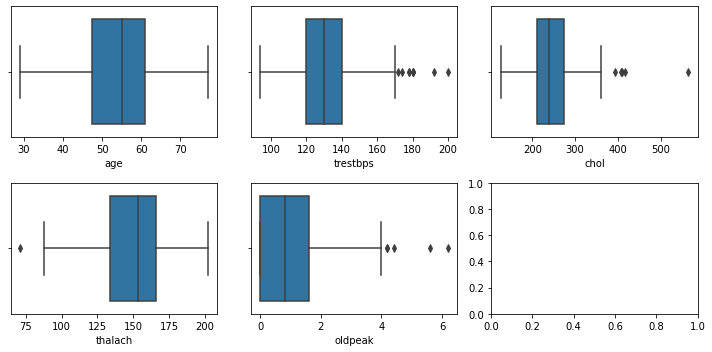

In [65]:

#'age','trestbps','chol','thalach','oldpeak'


fig, axs = plt.subplots(2,3,figsize = (10,5))
plt1 = sns.boxplot(df['age'], ax = axs[0][0])
plt2 = sns.boxplot(df['trestbps'], ax = axs[0][1])
plt3 = sns.boxplot(df['chol'], ax = axs[0][2])
plt4 = sns.boxplot(df['thalach'], ax = axs[1][0])
plt5 = sns.boxplot(df['oldpeak'], ax = axs[1][1])

plt.tight_layout()

In [66]:
print(df[df['trestbps']>160].shape)
print(df[df['chol']>400].shape)
print(df[df['oldpeak']>4].shape)

(15, 14)
(4, 14)
(5, 14)


In [67]:
'''
slope
thal
cp
'''

slope_dummy = pd.get_dummies(df['slope'], drop_first = True, prefix = 'slope')
thal_dummy = pd.get_dummies(df['thal'], drop_first = True, prefix = 'thal')
cp_dummy = pd.get_dummies(df['cp'], drop_first = True, prefix = 'cp')

print(slope_dummy.head())
print(thal_dummy.head())
print(cp_dummy.head())

   slope_1  slope_2
0        0        0
1        0        0
2        0        1
3        0        1
4        0        1
   thal_1  thal_2  thal_3
0       1       0       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
   cp_1  cp_2  cp_3
0     0     0     1
1     0     1     0
2     1     0     0
3     1     0     0
4     0     0     0


In [68]:
df = pd.concat([df,slope_dummy, thal_dummy, cp_dummy],axis=1)
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0      2.3  ...   
1   37    1   2       130   250    0        1      187      0      3.5  ...   
2   41    0   1       130   204    0        0      172      0      1.4  ...   
3   56    1   1       120   236    0        1      178      0      0.8  ...   
4   57    0   0       120   354    0        1      163      1      0.6  ...   

   thal  target  slope_1  slope_2  thal_1  thal_2  thal_3  cp_1  cp_2  cp_3  
0     1       1        0        0       1       0       0     0     0     1  
1     2       1        0        0       0       1       0     0     1     0  
2     2       1        0        1       0       1       0     1     0     0  
3     2       1        0        1       0       1       0     1     0     0  
4     2       1        0        1       0       1       0     0     0     0  

[5 rows x 22 columns]


In [69]:
df.drop(['slope', 'thal','cp'], axis = 1, inplace = True )
print(df.head())

   age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0   63    1       145   233    1        0      150      0      2.3   0   
1   37    1       130   250    0        1      187      0      3.5   0   
2   41    0       130   204    0        0      172      0      1.4   0   
3   56    1       120   236    0        1      178      0      0.8   0   
4   57    0       120   354    0        1      163      1      0.6   0   

   target  slope_1  slope_2  thal_1  thal_2  thal_3  cp_1  cp_2  cp_3  
0       1        0        0       1       0       0     0     0     1  
1       1        0        0       0       1       0     0     1     0  
2       1        0        1       0       1       0     1     0     0  
3       1        0        1       0       1       0     1     0     0  
4       1        0        1       0       1       0     0     0     0  


In [70]:
print(df.shape)

(303, 19)


In [71]:
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 200)
print(df_train.shape)
print(df_test.shape)

(242, 19)
(61, 19)


In [72]:
y_train = df_train['target'].values
X_train = df_train.drop('target',axis=1)
y_test  = df_test['target'].values
X_test  = df_test.drop('target',axis = 1)
print("Shape of X_train : {}".format(X_train.shape))
print("Shape of y_train : {}".format(y_train.shape))
print("Shape of X_test : {}".format(X_test.shape))
print("Shape of y_test : {}".format(y_test.shape))


Shape of X_train : (242, 18)
Shape of y_train : (242,)
Shape of X_test : (61, 18)
Shape of y_test : (61,)


In [73]:
# Normalization of data  to bring the values between 0-1

X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test  = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))
print(X_train.shape)
print(X_test.shape)

(242, 18)
(61, 18)


In [94]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

### Logistic Regression implemented in Keras

In [95]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam

In [110]:
model = Sequential()
model.add(Dense(1, input_shape = (X_train.shape[1],), activation = 'sigmoid'))
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 19        
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 200, validation_data = [X_test,y_test], batch_size = 8)

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 1s 4ms/sample - loss: 0.6543 - accuracy: 0.5744 - val_loss: 0.6814 - val_accuracy: 0.5082
Epoch 2/200
242/242 [==============================] - 0s 522us/sample - loss: 0.6353 - accuracy: 0.6033 - val_loss: 0.6537 - val_accuracy: 0.5082
Epoch 3/200
242/242 [==============================] - 0s 544us/sample - loss: 0.6190 - accuracy: 0.6281 - val_loss: 0.6298 - val_accuracy: 0.6393
Epoch 4/200
242/242 [==============================] - 0s 567us/sample - loss: 0.6044 - accuracy: 0.6777 - val_loss: 0.6094 - val_accuracy: 0.6885
Epoch 5/200
242/242 [==============================] - 0s 614us/sample - loss: 0.5916 - accuracy: 0.7190 - val_loss: 0.5925 - val_accuracy: 0.7213
Epoch 6/200
242/242 [==============================] - 0s 474us/sample - loss: 0.5806 - accuracy: 0.7355 - val_loss: 0.5786 - val_accuracy: 0.7377
Epoch 7/200
242/242 [==============================] - 0s 480us/sample - lo

In [118]:
y_pred = model.predict(X_test)

In [119]:
for i in range(y_pred.shape[0]):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [134]:
y_test = y_test.reshape(-1,1)
print(y_test.shape)

(61, 1)


In [136]:
accuracy = np.sum(y_test == y_pred) / y_test.shape[0]
print("Test Accuracy : {:.2f} %".format(accuracy * 100))

Test Accuracy : 91.80 %


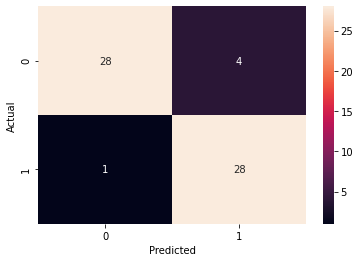

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, annot = True)

### Logistic Regression implemented in Sklearn

In [140]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [141]:
lr.fit(X_train,y_train)

LogisticRegression()

In [142]:
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [146]:
from sklearn.metrics import accuracy_score
print("Train Accuracy : {:.2f}% ".format(accuracy_score(y_train, y_pred_train)*100))
print("Test Accuracy : {:.2f}% ".format(accuracy_score(y_test, y_pred)*100))

Train Accuracy : 85.12% 
Test Accuracy : 91.80% 
